In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [37]:
!pip install selenium

    100% |████████████████████████████████| 952kB 300kB/s ta 0:00:01    27% |████████▋                       | 256kB 315kB/s eta 0:00:03
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!wget --no-check-certificate https://openaq-data.s3.amazonaws.com/2018-04-06.csv /Users/nipun/Downloads/

--2018-06-21 16:03:06--  https://openaq-data.s3.amazonaws.com/2018-04-06.csv
Resolving openaq-data.s3.amazonaws.com (openaq-data.s3.amazonaws.com)... 54.231.48.160
Connecting to openaq-data.s3.amazonaws.com (openaq-data.s3.amazonaws.com)|54.231.48.160|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 133839107 (128M) [text/csv]
Saving to: ‘2018-04-06.csv’

2018-04-06.csv      100%[===================>] 127.64M  1.61MB/s    in 3m 59s  

2018-06-21 16:07:06 (546 KB/s) - ‘2018-04-06.csv’ saved [133839107/133839107]

/Users/nipun/Downloads/: Scheme missing.
FINISHED --2018-06-21 16:07:06--
Total wall clock time: 4m 1s
Downloaded: 1 files, 128M in 3m 59s (546 KB/s)


In [5]:
df = pd.read_csv("2018-04-06.csv")

In [17]:
df = df[(df.country=='IN')&(df.parameter=='pm25')].dropna().groupby("location").mean()

In [15]:
from mpl_toolkits.basemap import Basemap


/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


(1,
 5,
 [68.18624878, 6.75425577, 0.0, 0.0],
 [97.41516113, 35.50133133, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x10e728b70>)

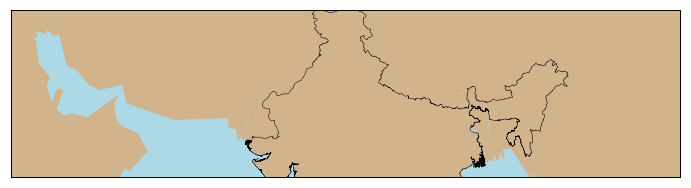

In [36]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=1500000,resolution='c',projection='aea',lon_0=77,lat_0=28)
#m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
#m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
#m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
#m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.readshapefile('/Users/nipun/Downloads/gadm36_IND_shp/gadm36_IND_0' ,'.shp')
